Missing data is common in most data analysis applications.

One of the goals in designing pandas was to make working with missing data as painless as possible

In [1]:
import pandas as pd

/home/student/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
from numpy import NaN, NAN, nan

**Pandas** uses the floating point value NaN (Not a Number) to represent missing data in
both floating as well as in non-floating point array

The thing with missing values is that they are not true, nor false, nor equal to each other. 
The reason beyond this is it could be 10 , 2.5 or anything else.
We have no idea what it is

In [3]:
nan == True

False

In [4]:
nan == False  ## missing value is not a boolean expression

False

In [5]:
nan == nan ## mising value is not equal to missing value

False

In [6]:
pd.isnull(nan) ## non available number, yes nan is missing value

True

In [7]:
pd.isnull(42)

False

In [8]:
pd.isnull('-') ## by default '-' is not the missing value 

False

In [9]:
NaN == nan ## missing value is not a true nor false boolean value

False

Let's create a series with  missing values in it.

In [10]:
data =  pd.Series(['limbe' , 'douala', nan, 'buea',NAN, 'muyuka',NaN, 'bafut', 'wum'])
data

0     limbe
1    douala
2       NaN
3      buea
4       NaN
5    muyuka
6       NaN
7     bafut
8       wum
dtype: object

In [11]:
data.isnull()                      #.value_counts() '()' = it's no function

0    False
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8    False
dtype: bool

In [12]:
data.notnull() ## which value is notnull or not missing

0     True
1     True
2    False
3     True
4    False
5     True
6    False
7     True
8     True
dtype: bool

In [38]:
data

0     limbe
1    douala
2       NaN
3      buea
4       NaN
5    muyuka
6       NaN
7     bafut
8       wum
dtype: object

We have a number of options for filtering out missing data. While doing it by hand is
always an option, **dropna** can be very helpful. On a Series, it returns the Series with only
the non-null data and index values:

In [13]:
data.dropna()## the missing values are being keep out

0     limbe
1    douala
3      buea
5    muyuka
7     bafut
8       wum
dtype: object

In [14]:
data[data.notnull()]## index those whose are not missing

0     limbe
1    douala
3      buea
5    muyuka
7     bafut
8       wum
dtype: object

With DataFrame objects, these are a bit more complex. You may want to drop rows
or columns which are all NA or just those containing any NAs. dropna by default drops
any row containing a missing value

In [42]:
a=data[data.notnull()]
a.reindex=[i for i in range(len(a))]
a.index

Int64Index([0, 1, 3, 5, 7, 8], dtype='int64')

In [45]:
df = pd.DataFrame([['alan' ,'bob', 'tim', NAN, 'jonas', 'kate'], 
                   [2,4,6,8,10,12] ,
                   [NaN for i in range(6)],
                  list('abcdef')]
                 )

In [46]:
df

,0,1,2,3,4,5
0,alan,bob,tim,NaN,jonas,kate
1,2,4,6,8,10,12
2,NaN,NaN,NaN,NaN,NaN,NaN
3,a,b,c,d,e,f


In [47]:
df.dropna(axis=0)## df_dropna_rowflash

,0,1,2,3,4,5
1,2,4,6,8,10,12
3,a,b,c,d,e,f


In [48]:
df

,0,1,2,3,4,5
0,alan,bob,tim,NaN,jonas,kate
1,2,4,6,8,10,12
2,NaN,NaN,NaN,NaN,NaN,NaN
3,a,b,c,d,e,f


In [49]:
df.dropna(axis=1)

""
0
1
2
3


In [19]:
df.dropna(how='all' , axis=0)## nothing could be save because all the columns have missing values
## drop where all the item are not available(NaN)

,0,1,2,3,4,5
0,alan,bob,tim,NaN,jonas,kate
1,2,4,6,8,10,12
3,a,b,c,d,e,f


Dropping columns in the same way is only a matter of passing **axis=1**

In [20]:
df.dropna(axis=1, how='all') ## tresh = 2 means minimum missing values in column or rowstack

,0,1,2,3,4,5
0,alan,bob,tim,NaN,jonas,kate
1,2,4,6,8,10,12
2,NaN,NaN,NaN,NaN,NaN,NaN
3,a,b,c,d,e,f


In [21]:
df

,0,1,2,3,4,5
0,alan,bob,tim,NaN,jonas,kate
1,2,4,6,8,10,12
2,NaN,NaN,NaN,NaN,NaN,NaN
3,a,b,c,d,e,f


In [79]:
df[df.isna().all(axis=1)]## any iff we want any contenairs of NaN 

,0,1,2,3,4,5
2,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#THE EBOLA DATASETS  2014 wEST AFRICA OUTBREAK
ebola = pd.read_csv('data/ebola_country_timeseries.csv')

In [54]:
ebola#.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ebola.info()  #object is a generic way of saying this is a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [53]:
# tally of missing values (or whatever is it) 
ebola['Cases_Liberia'].value_counts(dropna=True)#.head()
#The most frequent get sorted to the top    #another way to get duplicates

13.0      9
12.0      4
8.0       3
27.0      2
8166.0    1
         ..
2407.0    1
2081.0    1
1871.0    1
1698.0    1
3.0       1
Name: Cases_Liberia, Length: 69, dtype: int64

In [26]:
# how many unique
ebola['Cases_Guinea'].nunique()

88

In [27]:
# the actual unique values
ebola['Cases_Guinea'].unique()

array([2776., 2775., 2769.,   nan, 2730., 2706., 2695., 2630., 2597.,
       2571., 2416., 2292., 2164., 2134., 2047., 1971., 1919., 1878.,
       1760., 1731., 1667., 1906., 1553., 1540., 1519., 1472., 1350.,
       1298., 1199., 1157., 1074., 1022., 1008.,  942.,  936.,  899.,
        861.,  812.,  771.,  648.,  607.,  579.,  543.,  519.,  510.,
        506.,  495.,  485.,  472.,  460.,  427.,  415.,  410.,  411.,
        406.,  409.,  408.,  412.,  413.,  390.,  398.,  351.,  344.,
        328.,  291.,  281.,  258.,  248.,  233.,  236.,  235.,  231.,
        226.,  224.,  218.,  208.,  203.,  197.,  168.,  159.,  158.,
        151.,  143.,  127.,  122.,  112.,  103.,   86.,   49.])

In [28]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


### Filling the missing values

Rather than filtering out missing data (and potentially discarding other data along with
it), you may want to fill in the “holes” in any number of ways. 

For most purposes, the
**fillna** method is the workhorse function to use. Calling fillna with a constant replaces
missing values with that value

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
a=np.random.randint(5,15,75)
a
#plt.hist(a)

array([10, 12,  8, 10, 11, 12, 11, 10, 10,  6,  7,  8,  6, 14, 13, 11,  6,
       14,  8,  7,  5, 10, 11, 11,  6,  5,  9, 12, 14, 11, 13, 13, 12, 11,
       12,  6,  5, 10,  8, 12, 11,  5,  5,  6, 11, 14,  6,  9, 13, 11,  8,
       14, 13, 13, 11,  5, 12,  6,  8,  8, 11,  6, 14, 12, 11,  8,  6,  6,
        9, 13, 13,  7, 12,  6, 10])

(array([ 6., 12.,  3.,  8.,  3.,  7., 13.,  9.,  8.,  6.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ]),
 <BarContainer object of 10 artists>)

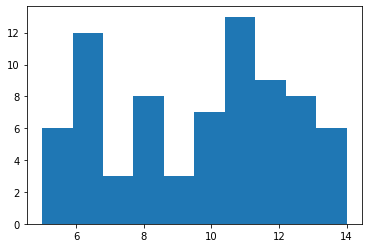

In [74]:
plt.hist(a)

In [75]:
b=a
b[45]=43

(array([29., 32., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5. ,  8.8, 12.6, 16.4, 20.2, 24. , 27.8, 31.6, 35.4, 39.2, 43. ]),
 <BarContainer object of 10 artists>)

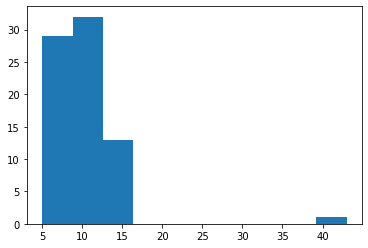

In [76]:
plt.hist(b)

In [29]:
ebola.fillna(100) ## NaN  are replace by 100

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,100.0,10030.0,100.0,100.0,100.0,100.0,100.0,1786.0,100.0,2977.0,100.0,100.0,100.0,100.0,100.0
1,1/4/2015,288,2775.0,100.0,9780.0,100.0,100.0,100.0,100.0,100.0,1781.0,100.0,2943.0,100.0,100.0,100.0,100.0,100.0
2,1/3/2015,287,2769.0,8166.0,9722.0,100.0,100.0,100.0,100.0,100.0,1767.0,3496.0,2915.0,100.0,100.0,100.0,100.0,100.0
3,1/2/2015,286,100.0,8157.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,3496.0,100.0,100.0,100.0,100.0,100.0,100.0
4,12/31/2014,284,2730.0,8115.0,9633.0,100.0,100.0,100.0,100.0,100.0,1739.0,3471.0,2827.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,100.0,100.0,100.0,100.0,100.0,66.0,6.0,5.0,100.0,100.0,100.0,100.0,100.0
118,3/26/2014,4,86.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,62.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
119,3/25/2014,3,86.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,60.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
120,3/24/2014,2,86.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,59.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [82]:
ebola.head(10)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


However, it does exist some sophisticated methods to fill our missing values.


When facing certains measurements, it might be convenient to fill the na values with the value forward the missing point or backward the missing point

We therefore the forward fill **ffill** and the backward fill **bfill**

In [31]:
ebola.fillna(method='ffill').head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [83]:
ebola.fillna(method='bfill').head(10)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
5,12/28/2014,281,2706.0,8018.0,9446.0,20.0,1.0,4.0,1.0,7.0,1708.0,3423.0,2758.0,8.0,0.0,1.0,0.0,6.0
6,12/27/2014,280,2695.0,7977.0,9409.0,20.0,1.0,4.0,1.0,7.0,1697.0,3413.0,2732.0,8.0,0.0,1.0,0.0,6.0
7,12/24/2014,277,2630.0,7977.0,9203.0,20.0,1.0,4.0,1.0,7.0,1607.0,3413.0,2655.0,8.0,0.0,1.0,0.0,6.0
8,12/21/2014,273,2597.0,7862.0,9004.0,20.0,1.0,4.0,1.0,7.0,1607.0,3384.0,2582.0,8.0,0.0,1.0,0.0,6.0
9,12/20/2014,272,2571.0,7862.0,8939.0,20.0,1.0,4.0,1.0,7.0,1586.0,3384.0,2556.0,8.0,0.0,1.0,0.0,6.0


In [33]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


To complete a sum over a column containing the missing values , the .sum() function automatically skips them.
It is the same for others descriptive stats such as mean() , std(), var()

In [34]:
ebola['Cases_Guinea'].sum()

84729.0

In [85]:
ebola['Cases_Guinea'].sum(skipna=False)## False means do not skip(sauter) the missing values

nan

In [36]:
df = pd.DataFrame({
    'a': [1, 2, 88, 99],
    'b': [3, NaN, 999, NaN]
})
df

,a,b
0,1,3.0
1,2,NaN
2,88,999.0
3,99,NaN


In [86]:
df.replace(to_replace=[88, 99, 999], value=NaN) ## Overffitting, basically, it return ths detards

,0,1,2,3,4,5
0,alan,bob,tim,NaN,jonas,kate
1,2,4,6,8,10,12
2,NaN,NaN,NaN,NaN,NaN,NaN
3,a,b,c,d,e,f
